In [1]:
import pandas as pd
import numpy as np

In [99]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
X_data = pd.read_csv("prepared_data_on_student_outflows\X.csv")
y_data = pd.read_csv("prepared_data_on_student_outflows\y.csv")

In [5]:
X = X_data.drop("user_id", axis=1)
y = y_data.drop("Unnamed: 0", axis=1)

In [6]:
X.head()

,day,total_steps,correct,wrong,proportion_correct_answers,viewed
0,1.0,2.0,2.0,0.0,1.00,9
1,1.0,4.0,4.0,4.0,0.50,20
2,1.0,11.0,9.0,21.0,0.30,154
3,1.0,1.0,0.0,1.0,0.00,9
4,3.0,23.0,23.0,27.0,0.46,132


In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=17)

## DecisionTreeClassifier

In [10]:
clf = tree.DecisionTreeClassifier()

In [11]:
parametrs = {'max_depth': range(1, 31, 5),
          'min_samples_leaf': range(1, 21, 5),
          'min_samples_split': range(2, 51, 5)   
}

In [12]:
tree_grid = GridSearchCV(clf, parametrs, cv=5)

In [13]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: total: 9.22 s
Wall time: 9.37 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 31, 5),
                         'min_samples_leaf': range(1, 21, 5),
                         'min_samples_split': range(2, 51, 5)})

In [14]:
tree_grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 17}

In [15]:
best_clf = tree_grid.best_estimator_

In [16]:
best_clf.score(X_valid, y_valid)

0.9217171717171717

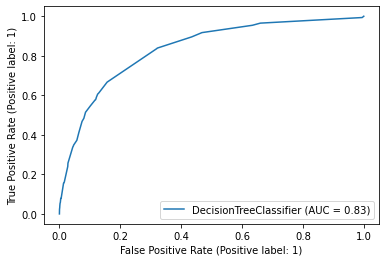

In [21]:
metrics.plot_roc_curve(best_clf, X_valid, y_valid)

### adjust the parameters of the DecisionTreeClassifier

In [22]:
parametrs = {'max_depth': range(5, 10),
          'min_samples_leaf': range(5, 10),
          'min_samples_split': range(15, 20)   
}

tree_grid = GridSearchCV(clf, parametrs, cv=5)

In [23]:
%%time
tree_grid.fit(X_train, y_train)

CPU times: total: 4.52 s
Wall time: 4.59 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 10),
                         'min_samples_leaf': range(5, 10),
                         'min_samples_split': range(15, 20)})

In [24]:
best_clf = tree_grid.best_estimator_
tree_grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 9, 'min_samples_split': 15}

In [25]:
best_clf.score(X_valid, y_valid)

0.922053872053872

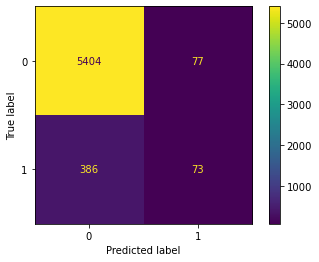

In [27]:
metrics.plot_confusion_matrix(best_clf, X_valid, y_valid)

In [28]:
y_pred = best_clf.predict(X_valid)

In [29]:
precision_score(y_valid, y_pred)

0.4866666666666667

In [30]:
recall_score(y_valid, y_pred)

0.15904139433551198

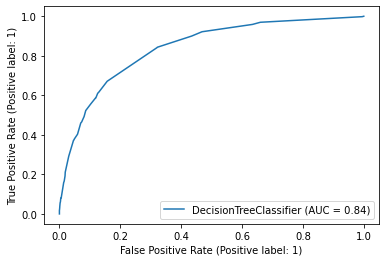

In [31]:
metrics.plot_roc_curve(best_clf, X_valid, y_valid)

In [33]:
feature_importances = best_clf.feature_importances_
feature_importances_df = pd.DataFrame({"features": list(X), 
                                       "feature_importances": feature_importances})

In [35]:
feature_importances_df.sort_values("feature_importances", ascending=False)

,features,feature_importances
1,total_steps,0.799194
5,viewed,0.096203
4,proportion_correct_answers,0.042271
0,day,0.038358
2,correct,0.013844
3,wrong,0.010130


## RandomForestClassifier

In [76]:
clf_rf = RandomForestClassifier()

In [77]:
parametrs_rf = {'n_estimators':range(10, 100, 10), 
                'max_depth': range(1, 31, 5), 
                'min_samples_leaf': range(1, 51, 5), 
                'min_samples_split': range(2, 51, 5)   
}

In [78]:
tree_grid_rf = GridSearchCV(clf_rf, parametrs_rf, cv=5, n_jobs=-1)

In [79]:
%%time
tree_grid_rf.fit(X_train, y_train)

CPU times: total: 49.1 s
Wall time: 7min 18s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 31, 5),
                         'min_samples_leaf': range(1, 51, 5),
                         'min_samples_split': range(2, 51, 5),
                         'n_estimators': range(10, 100, 10)})

In [80]:
tree_grid_rf.best_params_

{'max_depth': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'n_estimators': 80}

In [81]:
best_clf_rf = tree_grid_rf.best_estimator_

In [82]:
best_clf_rf.score(X_valid, y_valid)

0.923063973063973

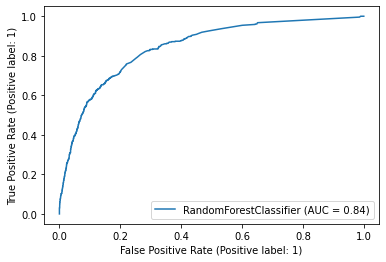

In [84]:
metrics.plot_roc_curve(best_clf_rf, X_valid, y_valid)

### adjust the parameters of the RandomForestClassifier

In [85]:
parametrs_rf = {'n_estimators': range(80, 81), 
                'max_depth': range(1, 10), 
                'min_samples_leaf': range(1, 10), 
                'min_samples_split': range(7, 8)   
}

In [86]:
tree_grid_rf = GridSearchCV(clf_rf, parametrs_rf, cv=5, n_jobs=-1)

In [87]:
%%time
tree_grid_rf.fit(X_train, y_train)

CPU times: total: 1.77 s
Wall time: 9 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(7, 8),
                         'n_estimators': range(80, 81)})

In [88]:
tree_grid_rf.best_params_

{'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'n_estimators': 80}

In [89]:
best_clf_rf = tree_grid_rf.best_estimator_

In [90]:
best_clf_rf.score(X_valid, y_valid)

0.9237373737373737

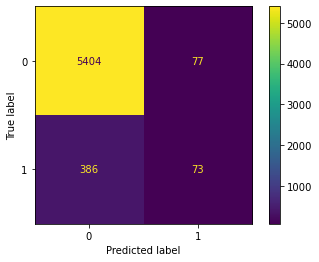

In [91]:
metrics.plot_confusion_matrix(best_clf, X_valid, y_valid)

In [92]:
y_pred = best_clf.predict(X_valid)

In [93]:
precision_score(y_valid, y_pred)

0.4866666666666667

In [94]:
recall_score(y_valid, y_pred)

0.15904139433551198

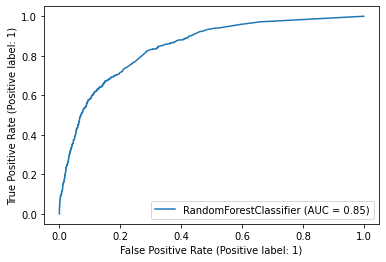

In [95]:
metrics.plot_roc_curve(best_clf_rf, X_valid, y_valid)

In [96]:
feature_importances_rf = best_clf_rf.feature_importances_

In [97]:
feature_importances_rf_df = pd.DataFrame({"features": list(X), 
                                       "feature_importances": feature_importances_rf})

In [98]:
feature_importances_rf_df.sort_values("feature_importances", ascending=False)

,features,feature_importances
2,correct,0.358446
1,total_steps,0.268195
5,viewed,0.186006
0,day,0.096770
3,wrong,0.046293
4,proportion_correct_answers,0.044290


## K Nearest Neighbors

In [100]:
knn = KNeighborsClassifier()

In [101]:
knn_parametrs = {"n_neighbors": range(1, 100, 5)}

In [102]:
knn_grid = GridSearchCV(knn, knn_parametrs, cv=5, n_jobs=-1)

In [103]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: total: 172 ms
Wall time: 4.02 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 5)})

In [104]:
knn_grid.best_params_

{'n_neighbors': 51}

In [105]:
best_knn = knn_grid.best_estimator_

In [106]:
best_knn.score(X_valid, y_valid)

0.9235690235690236

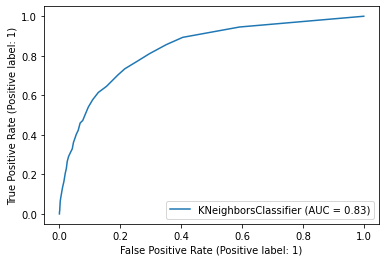

In [107]:
metrics.plot_roc_curve(best_knn, X_valid, y_valid)

### adjust the parameters of the knn

In [108]:
knn_parametrs = {"n_neighbors": range(45, 56)}

In [109]:
knn_grid = GridSearchCV(knn, knn_parametrs, cv=5, n_jobs=-1)

In [110]:
%%time
knn_grid.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 3.63 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(45, 56)})

In [111]:
knn_grid.best_params_

{'n_neighbors': 50}

In [112]:
best_knn = knn_grid.best_estimator_

In [113]:
best_knn.score(X_valid, y_valid)

0.9228956228956229

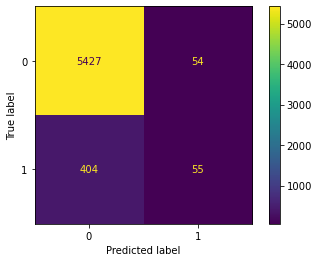

In [114]:
metrics.plot_confusion_matrix(best_knn, X_valid, y_valid)

In [115]:
y_pred = best_knn.predict(X_valid)

In [116]:
precision_score(y_valid, y_pred)

0.5045871559633027

In [117]:
recall_score(y_valid, y_pred)

0.11982570806100218

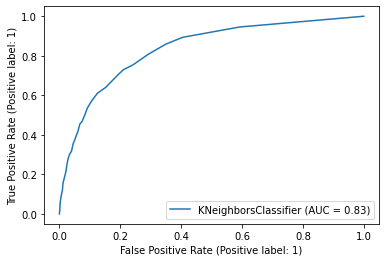

In [118]:
metrics.plot_roc_curve(best_knn, X_valid, y_valid)